## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("covid-19-seoul.csv")
df.shape

(454, 8)

In [3]:
df = df.sort_values(["연번"], ascending=False)

In [4]:
df.head()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
0,454,9699,3.30.,남('99),천안,미국,해외접촉 추정,-
1,453,확인중,3.30.,여('73),광명,-,구로구 교회 관련,-
2,452,9693,3.30.,여('65),구로구,-,구로구 교회 관련,-
3,451,9728,3.30.,여('98),용산구,미국,해외접촉 추정,-
4,450,9725,3.30.,남('64),중구,-,서울 444 접촉,보라매병원


In [5]:
df.tail()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
449,5,9,1.31.,여(‵92),성북구,-,#5 접촉,서울의료원(퇴원)
450,4,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
451,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원)
452,2,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
453,1,2,1.23.,남(‵64),강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(font="Malgun Gothic")
sns.set(font="AppleGothic")
plt.rc("axes", unicode_minus=False)

### 시각화 선명하게 설정하기

In [7]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 거주지별 확진자

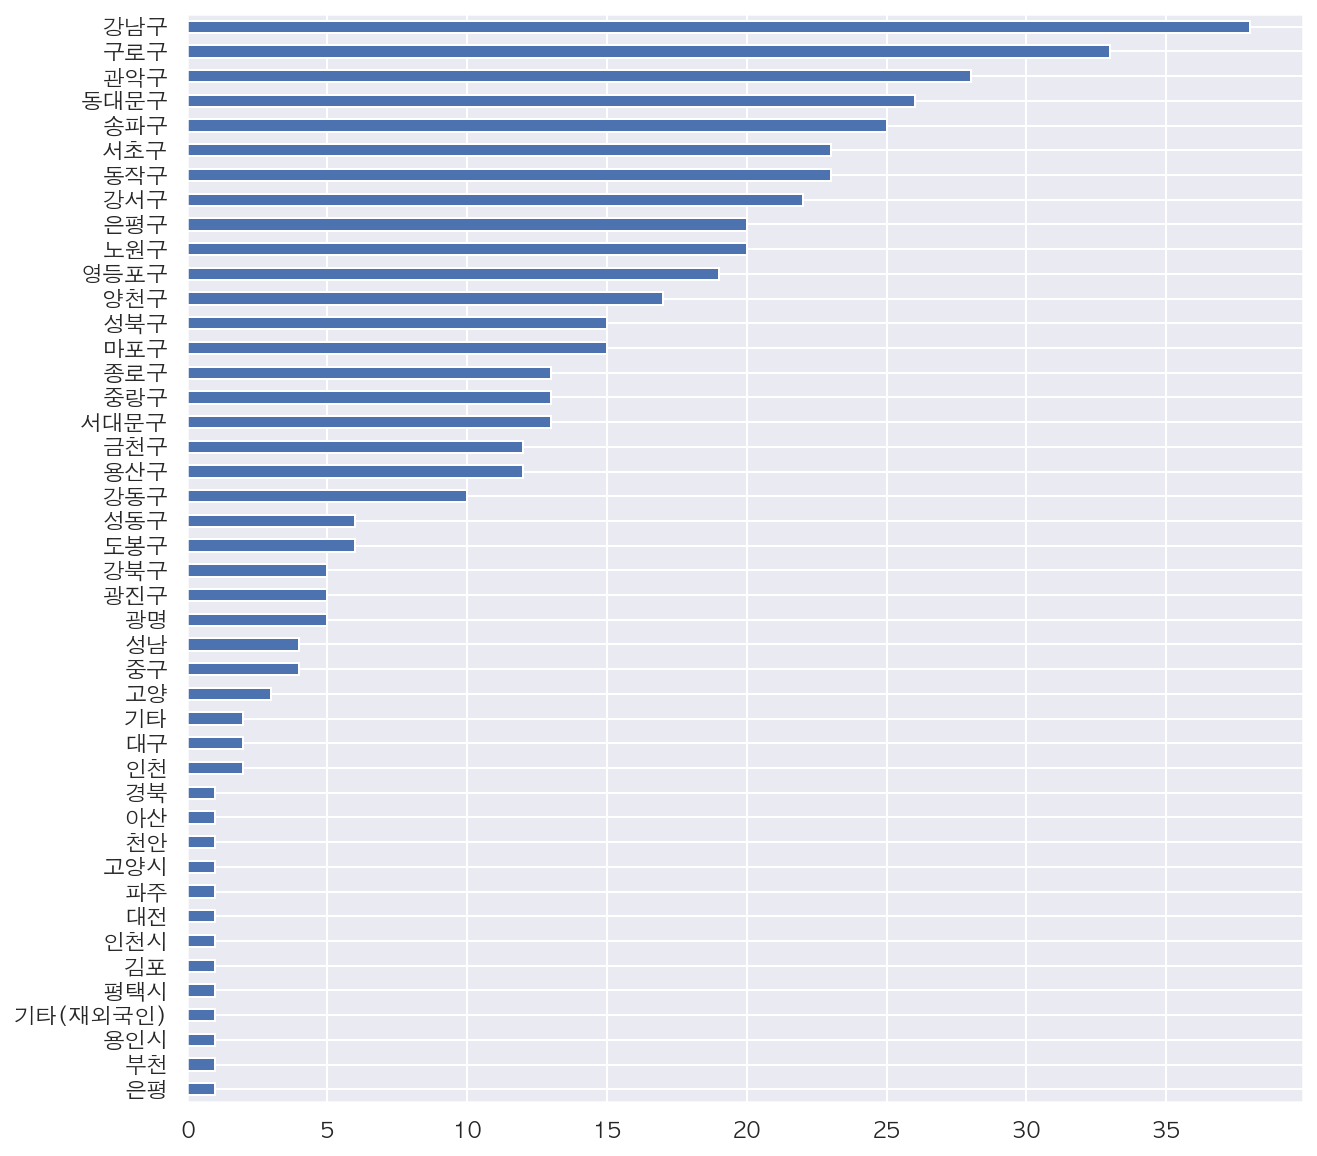

In [8]:
gu_count = df["거주지"].value_counts().sort_values()
gu_count.plot.barh(figsize=(10, 10))

In [9]:
import json

file_path = 'seoul_municipalities_geo_simple.json'
geo_json = json.load(open(file_path, encoding="utf-8"))
geo_json["features"][0]['properties']["name"]

'강동구'

In [10]:
gu = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
gu[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [11]:
df_gu = gu_count.reset_index()
df_gu.columns = ["구", "환자수"]
df_gu.head()

,구,환자수
0,은평,1
1,부천,1
2,용인시,1
3,기타(재외국인),1
4,평택시,1


In [12]:
df_gu["구"] = df_gu["구"].replace("은평", "은평구")
df_gu["지역"] = df_gu["구"].map(lambda x : x if x in gu else "타지역")
df_gu[["구", "지역"]].head()

,구,지역
0,은평구,은평구
1,부천,타지역
2,용인시,타지역
3,기타(재외국인),타지역
4,평택시,타지역


In [13]:
df_gu_etc = df_gu.groupby("지역")["환자수"].sum().sort_values()
df_gu_etc.head()

지역
중구     4
강북구    5
광진구    5
성동구    6
도봉구    6
Name: 환자수, dtype: int64

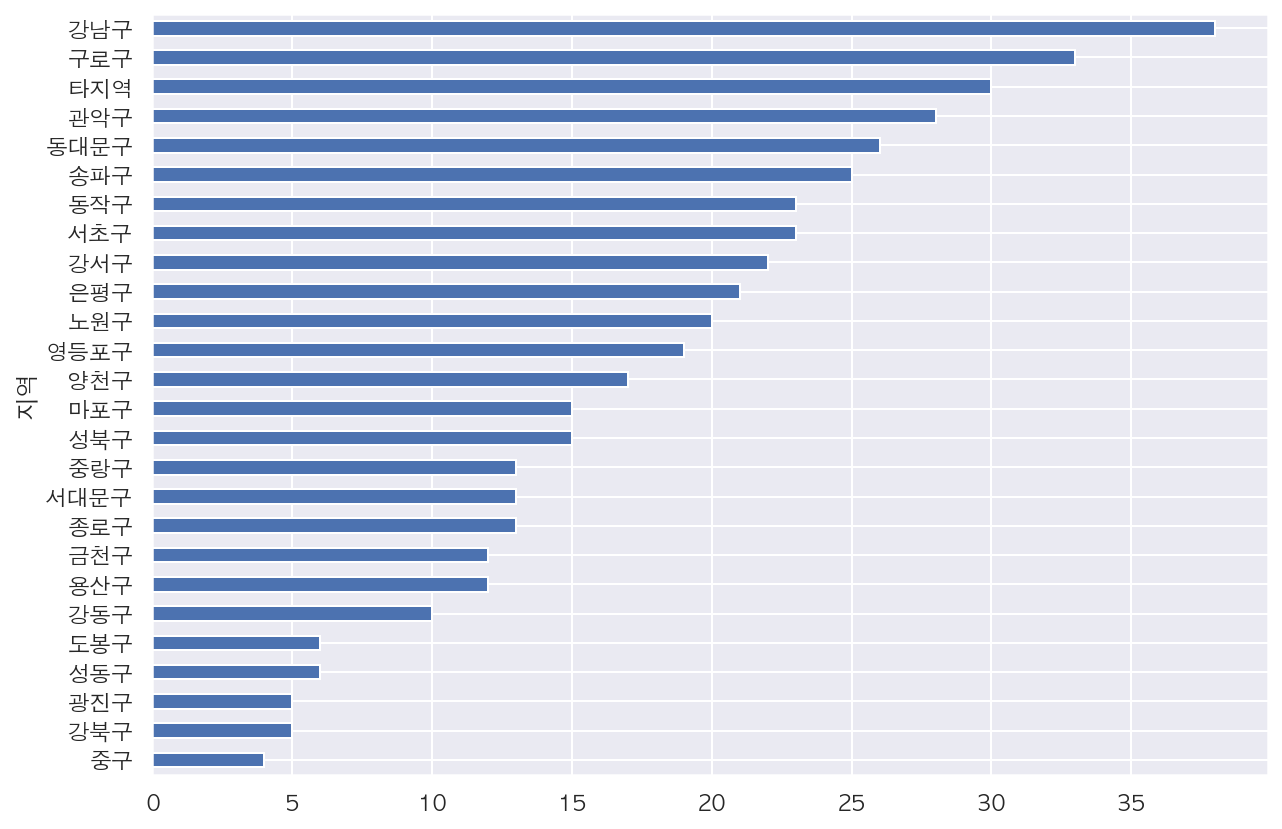

In [14]:
df_gu_etc.plot.barh(figsize=(10, 7))

In [15]:
import folium

m = folium.Map([37.562, 126.988], zoom_start=11, tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=gu_count,
    columns=['구', '환자수'],
    key_on='feature.properties.name',
    fill_color='Oranges',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='환자수'
).add_to(m)

m

## 조치사항

In [16]:
df["조치사항"].value_counts()

서울의료원          108
보라매병원           69
서남병원            67
생활치료센터          33
서울의료원(퇴원)       29
서남병원(퇴원)        17
국립중앙의료원(퇴원)     14
보라매병원(퇴원)       13
서북병원            13
국립중앙의료원         10
서울대학교병원(퇴원)     10
타시도이관            6
서북병원(퇴원)         6
서울성모병원           4
-                4
중앙대학교병원(퇴원)      4
타시도 이관           4
중앙대학교병원          3
상계백병원(퇴원)        3
타시도이관(퇴원)        3
서울아산병원           2
한일병원             2
한일병원(퇴원)         2
삼육서울병원           2
확인중              2
순천향서울병원          2
순천향대학병원          2
한양대학교병원(퇴원)      2
고대구로병원(퇴원)       2
강남세브란스           1
삼육서울병원(퇴원)       1
상계백병원            1
서울백병원            1
국립중앙의료병원         1
세브란스병원           1
서울대학교병원          1
상계병원             1
강북삼성병원           1
강남세브란스병원         1
순천향서울병원(퇴원)      1
경희대학교병원          1
중앙대병원            1
은평성모병원           1
고대안암병원           1
고대구로병원           1
Name: 조치사항, dtype: int64

In [17]:
df["확진일"].value_counts()

3.10.     46
3.9.      26
3.28.     22
3.29.     22
3.30.     19
3.20.     17
3.19.     17
3.11.     17
2.25.     15
3.27.     15
3.24.     14
3.26.     14
3.16.     13
3.25.     13
3.12.     12
2.27.     12
3.18.     11
2.26.     10
3.8.      10
3.13.      9
3.14.      8
3.21.      8
2.28.      8
3.6.       7
3.7.       7
3.1.       6
3.2.       6
3.22.      6
3.15.      6
2.20.      5
3.4.       5
3.23.      5
2.29.      5
3.17.      4
2.23.      4
2.22.      4
1.31.      3
2.24.      3
1.30.      3
2.16.      2
2.5.       2
2.21.      2
2.19.      2
3.3.       1
2.24..     1
1.23.      1
2.6.       1
2.2.       1
2.7.       1
2.25       1
3.5.       1
2.27       1
Name: 확진일, dtype: int64

In [18]:
df["확진일자"] = pd.to_datetime("2020"+ "-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

0   2020-03-30
1   2020-03-30
2   2020-03-30
3   2020-03-30
4   2020-03-30
Name: 확진일자, dtype: datetime64[ns]

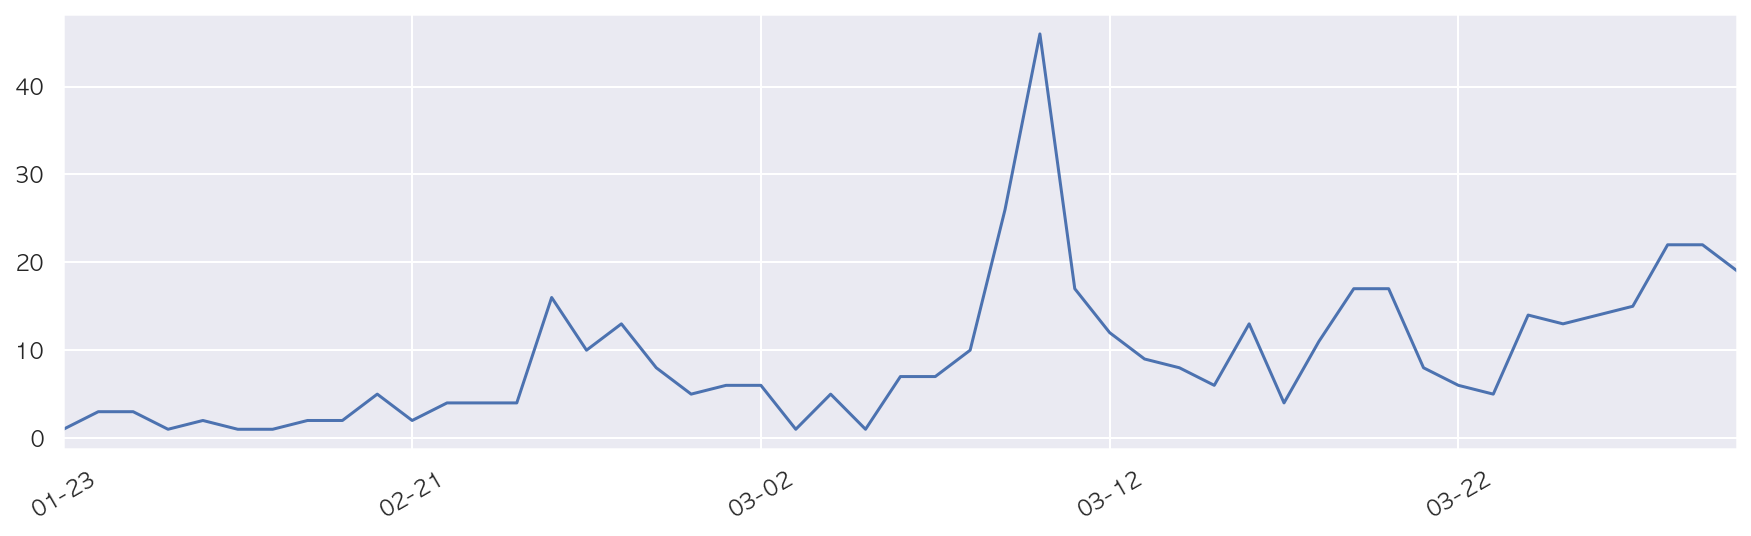

In [19]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df["월일"].value_counts().sort_index().plot(figsize=(15, 4), rot=30)

In [20]:
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[0]

1

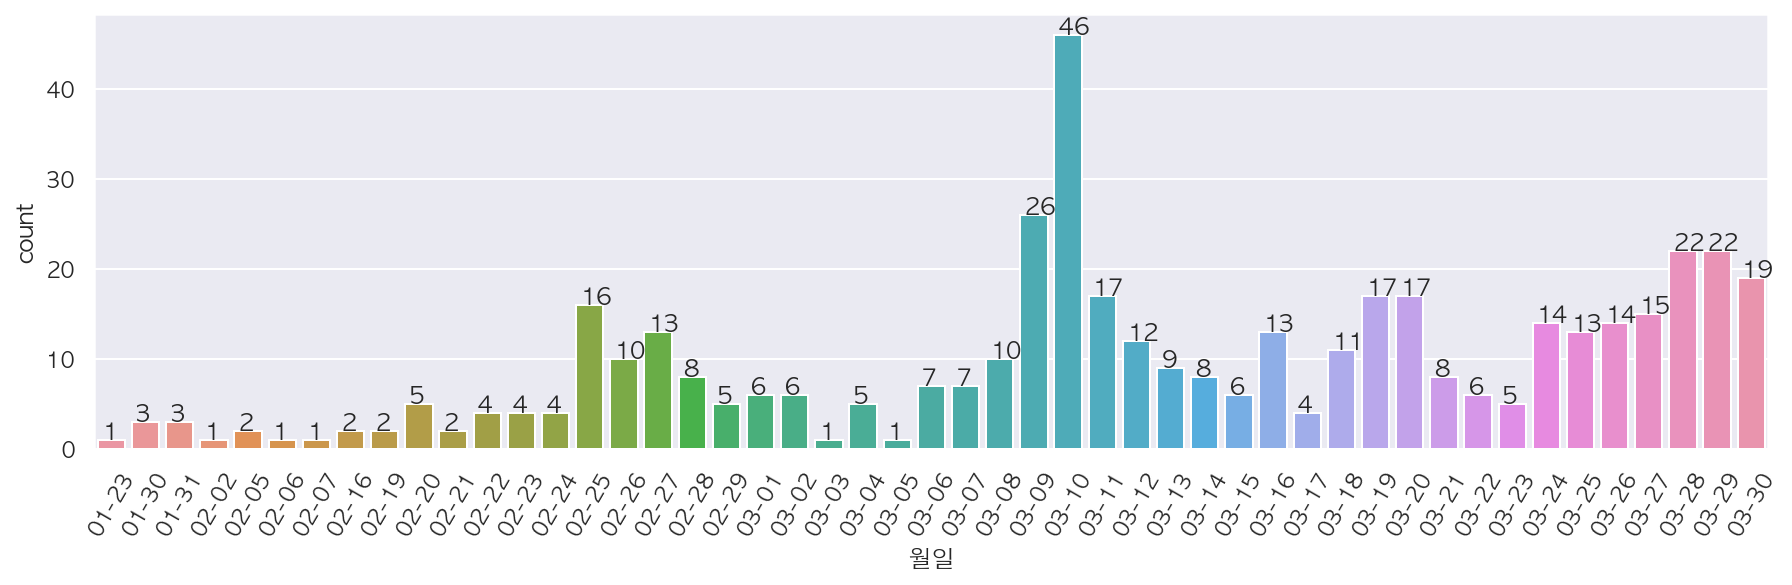

In [21]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
g = sns.countplot(data=df.sort_values(by="월일"), x="월일")

for i in range(len(day_count)):
    g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

## 누적확진

In [22]:
cum = df.groupby(["확진일자"])["연번"].count()
cum

확진일자
2020-01-23     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
2020-02-06     1
2020-02-07     1
2020-02-16     2
2020-02-19     2
2020-02-20     5
2020-02-21     2
2020-02-22     4
2020-02-23     4
2020-02-24     4
2020-02-25    16
2020-02-26    10
2020-02-27    13
2020-02-28     8
2020-02-29     5
2020-03-01     6
2020-03-02     6
2020-03-03     1
2020-03-04     5
2020-03-05     1
2020-03-06     7
2020-03-07     7
2020-03-08    10
2020-03-09    26
2020-03-10    46
2020-03-11    17
2020-03-12    12
2020-03-13     9
2020-03-14     8
2020-03-15     6
2020-03-16    13
2020-03-17     4
2020-03-18    11
2020-03-19    17
2020-03-20    17
2020-03-21     8
2020-03-22     6
2020-03-23     5
2020-03-24    14
2020-03-25    13
2020-03-26    14
2020-03-27    15
2020-03-28    22
2020-03-29    22
2020-03-30    19
Name: 연번, dtype: int64

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [23]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[0]["확진일자"]
first_day, last_day

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-03-30 00:00:00'))

In [24]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27'],
              dtype='datetime64[ns]', freq='D')

In [25]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
days = pd.DataFrame({"확진일자": days})
days.head()

,확진일자
0,2020-01-23
1,2020-01-24
2,2020-01-25
3,2020-01-26
4,2020-01-27


In [26]:
all_day = days.merge(cum, left_on="확진일자", right_on=cum.index, how="left")
all_day = all_day.rename(columns={"연번":"확진수"})
all_day.head()

,확진일자,확진수
0,2020-01-23,1.0
1,2020-01-24,NaN
2,2020-01-25,NaN
3,2020-01-26,NaN
4,2020-01-27,NaN


## 누적 확진자 수 구하기

In [27]:
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-23,1.0,1.0
1,2020-01-24,NaN,1.0
2,2020-01-25,NaN,1.0
3,2020-01-26,NaN,1.0
4,2020-01-27,NaN,1.0
...,...,...,...
63,2020-03-26,14.0,376.0
64,2020-03-27,15.0,391.0
65,2020-03-28,22.0,413.0
66,2020-03-29,22.0,435.0


In [28]:
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x: x[-5:])
all_day["일자"].head()

0    01-23
1    01-24
2    01-25
3    01-26
4    01-27
Name: 일자, dtype: object

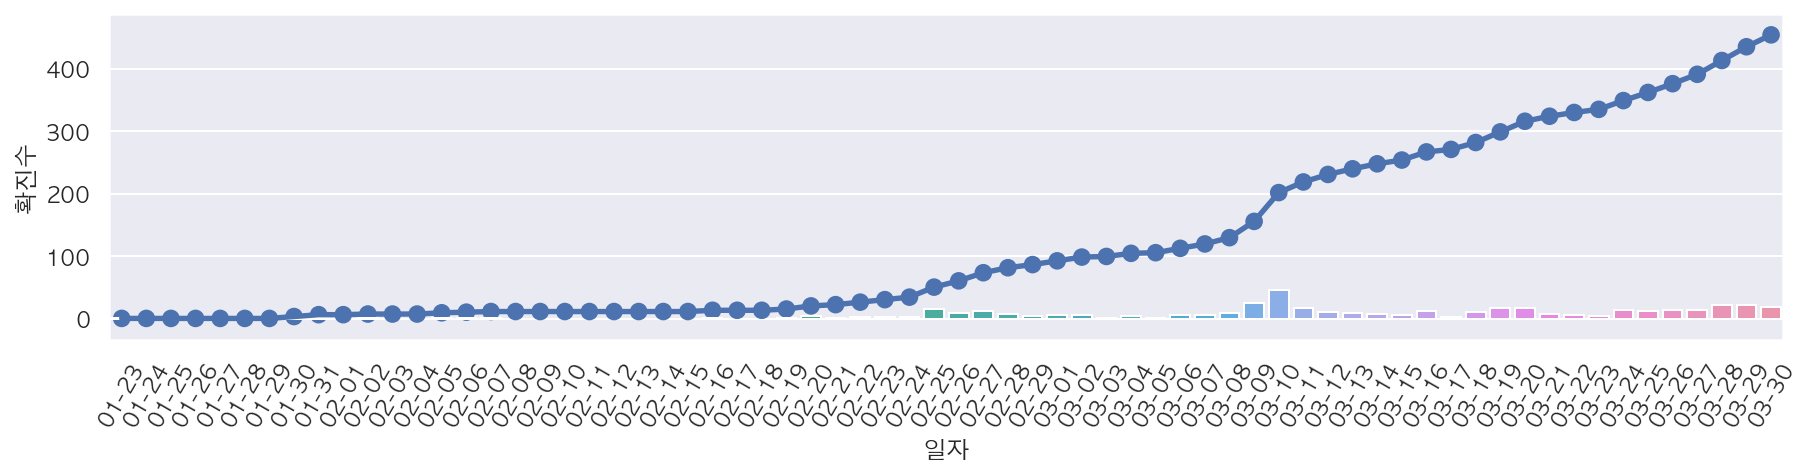

In [29]:
plt.figure(figsize=(15, 3))
plt.xticks(rotation=60)
sns.pointplot(data=all_day, x="일자", y="누적확진")
sns.barplot(data=all_day, x="일자", y="확진수")

In [30]:
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-23,1.0,1.0,01-23,1,3
1,2020-01-24,NaN,1.0,01-24,1,4
2,2020-01-25,NaN,1.0,01-25,1,5
3,2020-01-26,NaN,1.0,01-26,1,6
4,2020-01-27,NaN,1.0,01-27,1,0


## 요일별 확진 수 

In [31]:
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum().unstack()
all_day_week.style.background_gradient(cmap='PuBu')

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,4,3,0,0
2,4,16,14,19,11,9,7
3,69,65,46,44,48,45,50


## 접촉력

In [32]:
df["접촉력"].value_counts()

해외접촉 추정       106
구로구 콜센터 관련     60
확인중            34
콜센터직원 접촉       33
구로구 교회 관련      29
             ... 
#2621번 접촉자      1
#8138 접촉        1
#8063 접촉        1
구로구 콜센터 접촉      1
#3 접촉           1
Name: 접촉력, Length: 81, dtype: int64

In [33]:
df["접촉경로"] = df["접촉력"]
df.loc[df["접촉력"].str.contains("접촉자"), "접촉경로"] = "접촉자"
df.loc[df["접촉력"].str.contains("은평성모"), "접촉경로"] = "은평성모병원"
df.loc[df["접촉력"].str.contains("가족"), "접촉경로"] = "가족"
df.loc[df["접촉력"].str.contains("부동산"), "접촉경로"] = "부동산중개법인"
df.loc[df["접촉력"].str.contains("확잍중"), "접촉경로"] = "확인중"

In [34]:
df["접촉경로"].value_counts()

해외접촉 추정       106
구로구 콜센터 관련     60
확인중            35
콜센터직원 접촉       33
구로구 교회 관련      29
             ... 
#9020 접촉        1
#8063 접촉        1
구로구 콜센터 접촉      1
해외 접촉(추정)       1
#3 접촉           1
Name: 접촉경로, Length: 69, dtype: int64

## 가장 많은 전파가 일어난 번호

In [35]:
import re

re.sub("[^0-9]", "", "#7265 접촉(추정)")

'7265'

In [36]:
def get_number(text):
    return re.sub("[^0-9]", "", text)
    
get_number("#7265 접촉(추정)")

'7265'

In [37]:
df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
# contact = contact.drop(0)
contact.columns = ["환자번호", "전파수"]
contact.head()

,환자번호,전파수
0,,394
1,6,4
2,8791,3
3,8486,3
4,780,3


In [38]:
top_contact = contact.merge(df, left_on="환자번호", right_on="환자")
top_contact.head()

,환자번호,전파수,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
0,6,4,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,01-30,#3 접촉,3
1,8791,3,305,8791,3.20.,남('97),중랑구,필리핀,해외접촉 추정,국립중앙의료원,2020-03-20,03-20,해외접촉 추정,
2,8486,3,279,8486,3.18.,남('29),용산구,-,확인중,중앙대학교병원,2020-03-18,03-18,확인중,
3,780,3,31,780,2.22.,남('65),송파구,,대구 방문,중앙대학교병원(퇴원),2020-02-22,02-22,대구 방문,
4,9525,2,396,9525,3.28.,남('93),관악구,미국,해외접촉 추정,보라매병원,2020-03-28,03-28,해외접촉 추정,


In [39]:
top_contactor = top_contact.iloc[0, 0]
top_contactor

'6'

In [40]:
df[df["접촉경로"].str.contains(top_contactor)]

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
17,437,9709,3.30.,남('02),용산구,-,#9621 접촉,생활치료센터,2020-03-30,03-30,#9621 접촉,9621
51,403,9571,3.28.,여('80),동작구,-,#8669 접촉,보라매병원,2020-03-28,03-28,#8669 접촉,8669
110,344,9115,3.24.,남('59),강남구,-,#8646 접촉,서울성모병원,2020-03-24,03-24,#8646 접촉,8646
144,310,8792,3.20.,여('60),성북구,-,#8063 접촉,서울의료원,2020-03-20,03-20,#8063 접촉,8063
147,307,8713,3.20.,남('60),노원구,-,#8486 접촉,서울의료원,2020-03-20,03-20,#8486 접촉,8486
166,288,8601,3.19.,여('61),노원구,-,#8486 접촉,서울의료원,2020-03-19,03-19,#8486 접촉,8486
170,284,8617,3.19.,여('34),용산구,-,#8486 접촉,중앙대학교병원,2020-03-19,03-19,#8486 접촉,8486
191,263,8268,3.16.,남('01),구로구,-,#8196 접촉,서울의료원,2020-03-16,03-16,#8196 접촉,8196
263,191,7647,3.10.,여('90),은평구,"프랑스, 스페인",#6959 접촉(추정),서울의료원,2020-03-10,03-10,#6959 접촉(추정),6959
327,127,7280,3.8.,남('69),강남구,-,#6727 첩촉,보라매병원(퇴원),2020-03-08,03-08,#6727 첩촉,6727


In [41]:
pd.options.display.max_rows = 100

In [42]:
df_call = df[df["접촉경로"].str.contains("콜센터")]
print(df_call.shape)
df_call["접촉경로"].value_counts()

(96, 12)


구로구 콜센터 관련    60
콜센터직원 접촉      33
콜센터직원 접촉       2
구로구 콜센터 접촉     1
Name: 접촉경로, dtype: int64

## 조치사항

In [43]:
df["조치사항"].value_counts()

서울의료원          108
보라매병원           69
서남병원            67
생활치료센터          33
서울의료원(퇴원)       29
서남병원(퇴원)        17
국립중앙의료원(퇴원)     14
보라매병원(퇴원)       13
서북병원            13
국립중앙의료원         10
서울대학교병원(퇴원)     10
타시도이관            6
서북병원(퇴원)         6
서울성모병원           4
-                4
중앙대학교병원(퇴원)      4
타시도 이관           4
중앙대학교병원          3
상계백병원(퇴원)        3
타시도이관(퇴원)        3
서울아산병원           2
한일병원             2
한일병원(퇴원)         2
삼육서울병원           2
확인중              2
순천향서울병원          2
순천향대학병원          2
한양대학교병원(퇴원)      2
고대구로병원(퇴원)       2
강남세브란스           1
삼육서울병원(퇴원)       1
상계백병원            1
서울백병원            1
국립중앙의료병원         1
세브란스병원           1
서울대학교병원          1
상계병원             1
강북삼성병원           1
강남세브란스병원         1
순천향서울병원(퇴원)      1
경희대학교병원          1
중앙대병원            1
은평성모병원           1
고대안암병원           1
고대구로병원           1
Name: 조치사항, dtype: int64

In [44]:
df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "")

In [45]:
df["퇴원"].value_counts()

False    347
True     107
Name: 퇴원, dtype: int64

In [46]:
df["퇴원"].value_counts(normalize=True)

False    0.764317
True     0.235683
Name: 퇴원, dtype: float64

In [47]:
df["병원"].value_counts()

서울의료원       137
서남병원         84
보라매병원        82
생활치료센터       33
국립중앙의료원      24
서북병원         19
서울대학교병원      11
타시도이관         9
중앙대학교병원       7
서울성모병원        4
타시도 이관        4
-             4
한일병원          4
상계백병원         4
순천향서울병원       3
고대구로병원        3
삼육서울병원        3
순천향대학병원       2
확인중           2
한양대학교병원       2
서울아산병원        2
국립중앙의료병원      1
세브란스병원        1
서울백병원         1
강북삼성병원        1
강남세브란스        1
경희대학교병원       1
중앙대병원         1
상계병원          1
은평성모병원        1
강남세브란스병원      1
고대안암병원        1
Name: 병원, dtype: int64

## 성별

In [48]:
df["성별"] = df["성별(출생년)"].map(lambda x : x.split("(")[0])

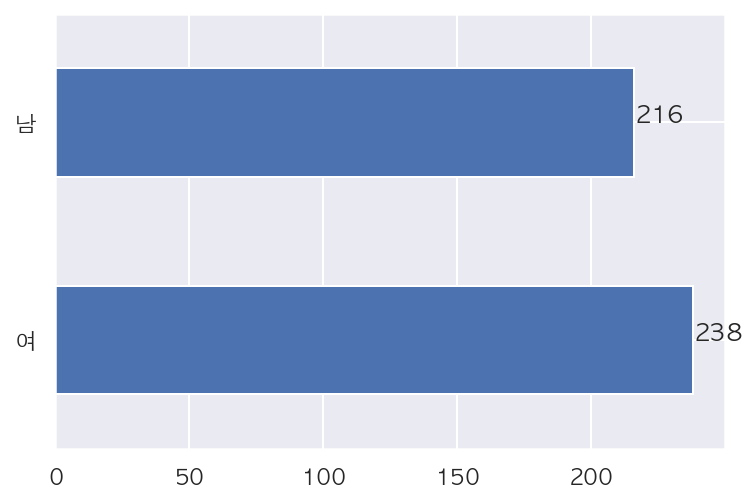

In [49]:
gender_count = df["성별"].value_counts()
g = gender_count.plot.barh()
for i, val in enumerate(gender_count):
    g.text(x=val, y=i, s=val)

## 연령

In [50]:
# df["출생년"] = df["성별(출생년)"].map(lambda x : 
#                   x.split("(")[-1].replace("'", "").replace("‵", "").replace(")", "").strip())

df["출생년"] = df["성별(출생년)"].map(get_number)

df.loc[df["출생년"].astype(int) > 20, "출생년"] = "19" + df["출생년"]
df.loc[df["출생년"].astype(int) <= 20, "출생년"] = "20" + df["출생년"]

In [51]:
df["출생년"].value_counts().head()

1994    18
1969    16
1996    14
1999    14
1998    14
Name: 출생년, dtype: int64

In [52]:
df["출생년"] = df["출생년"].astype(int)
df["나이"] = 2020 - df["출생년"]

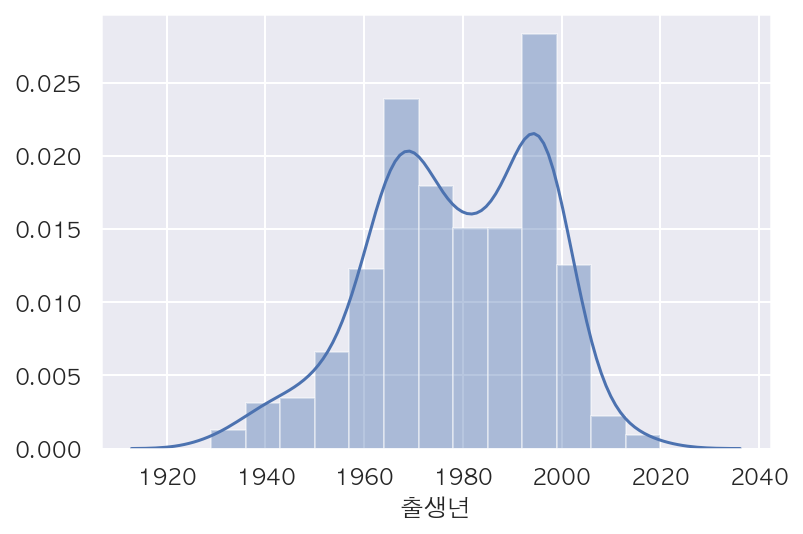

In [53]:
sns.distplot(df["출생년"])

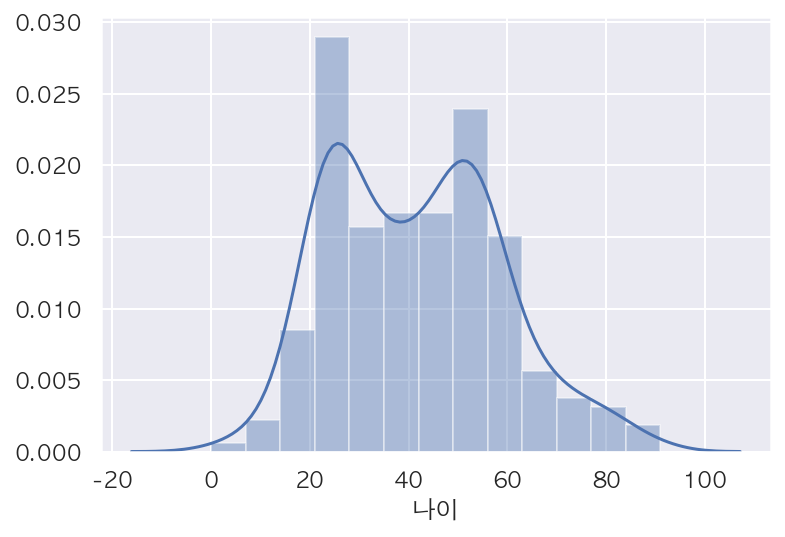

In [54]:
sns.distplot(df["나이"])

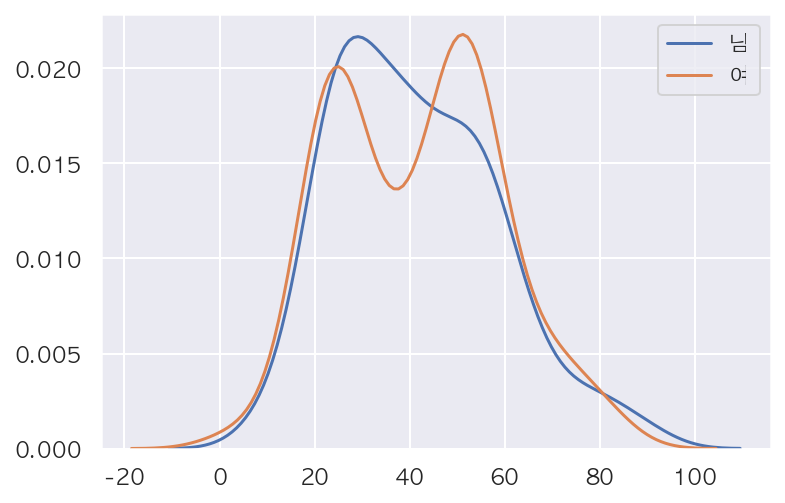

In [55]:
male_age = df.loc[df["성별"] == "남", "나이"]
female_age = df.loc[df["성별"] == "여", "나이"]
sns.kdeplot(male_age, label="남")
sns.kdeplot(female_age, label="여")

## 퇴원여부

In [56]:
df["퇴원"].value_counts()

False    347
True     107
Name: 퇴원, dtype: int64

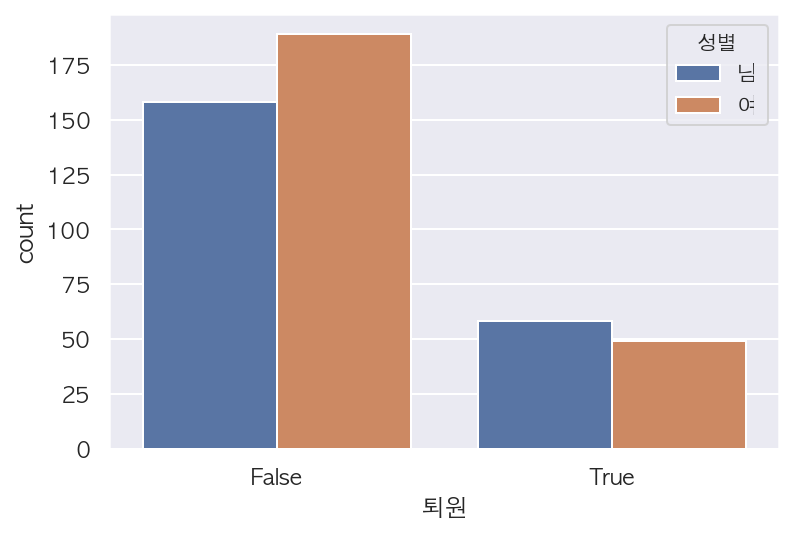

In [57]:
sns.countplot(data=df, x="퇴원", hue="성별")

## 여행력

In [58]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"] = df["해외"].replace("", np.nan)
df["해외"].value_counts()

미국                           45
영국                           21
필리핀                          10
프랑스                           6
태국                            6
스페인                           5
중국 우한시                        4
필리핀, 마닐라                      2
폴란드                           2
이탈리아, 프랑스                     2
이탈리아                          2
프랑스, 독일                       2
모로코, 프랑스, 오스트리아               1
베트남                           1
스페인, 프랑스                      1
미국, 캐나다                       1
우한 교민                         1
스페인,체코                        1
인도네시아                         1
캐나다                           1
브라질, 아르헨티아, 칠레, 볼리비아          1
싱가포르                          1
아르헨티나, 볼리비아, 브라질              1
독일                            1
영국, 프랑스                       1
이탈리아, 독일, 홍콩                  1
스페인, 카타르                      1
브라질                           1
체코, 헝가리, 오스트리아, 이탈리아, 프랑스     1
독일,프랑스                        1
프랑스, 스페인                      1
우한교민    

In [59]:
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(131, 18)

In [60]:
df_oversea["해외"] = df_oversea["해외"].replace("우한교민", "우한 교민")
df_oversea["해외"].value_counts()

미국                           45
영국                           21
필리핀                          10
프랑스                           6
태국                            6
스페인                           5
중국 우한시                        4
우한 교민                         2
필리핀, 마닐라                      2
폴란드                           2
이탈리아, 프랑스                     2
이탈리아                          2
프랑스, 독일                       2
베트남                           1
스페인, 프랑스                      1
미국, 캐나다                       1
브라질, 아르헨티아, 칠레, 볼리비아          1
스페인,체코                        1
인도네시아                         1
캐나다                           1
모로코, 프랑스, 오스트리아               1
아르헨티나, 볼리비아, 브라질              1
독일                            1
싱가포르                          1
영국, 프랑스                       1
이탈리아, 독일, 홍콩                  1
스페인, 카타르                      1
브라질                           1
체코, 헝가리, 오스트리아, 이탈리아, 프랑스     1
독일,프랑스                        1
프랑스, 스페인                      1
중국 청도   

In [61]:
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드"
europe = europe.replace(", ", "|")
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드'

In [62]:
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea["해외"].value_counts()

유럽                      50
미국                      45
필리핀                     10
태국                       6
중국 우한시                   4
필리핀, 마닐라                 2
우한 교민                    2
캐나다                      1
인도네시아                    1
일본                       1
미국, 캐나다                  1
멕시코, 미국                  1
싱가포르                     1
브라질                      1
아르헨티나, 볼리비아, 브라질         1
베트남                      1
중국 청도                    1
브라질, 아르헨티아, 칠레, 볼리비아     1
말레이시아                    1
Name: 해외, dtype: int64

In [63]:
day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count().groupby(level=[1]).cumsum()
day_oversea.head()

확진일자        해외    
2020-01-23  중국 우한시    1
2020-01-30  중국 우한시    3
2020-02-02  우한 교민     1
2020-02-05  싱가포르      1
2020-02-06  중국 우한시    4
Name: 연번, dtype: int64

In [64]:
day_oversea = day_oversea.reset_index()
day_oversea = day_oversea.rename(columns={'연번':'확진자수'})
print(day_oversea.shape)
day_oversea.head()

(65, 3)


,확진일자,해외,확진자수
0,2020-01-23,중국 우한시,1
1,2020-01-30,중국 우한시,3
2,2020-02-02,우한 교민,1
3,2020-02-05,싱가포르,1
4,2020-02-06,중국 우한시,4


In [65]:
oversea_count = df_oversea["해외"].value_counts(ascending=True)
oversea_count

말레이시아                    1
브라질, 아르헨티아, 칠레, 볼리비아     1
중국 청도                    1
베트남                      1
아르헨티나, 볼리비아, 브라질         1
브라질                      1
싱가포르                     1
멕시코, 미국                  1
미국, 캐나다                  1
일본                       1
인도네시아                    1
캐나다                      1
우한 교민                    2
필리핀, 마닐라                 2
중국 우한시                   4
태국                       6
필리핀                     10
미국                      45
유럽                      50
Name: 해외, dtype: int64

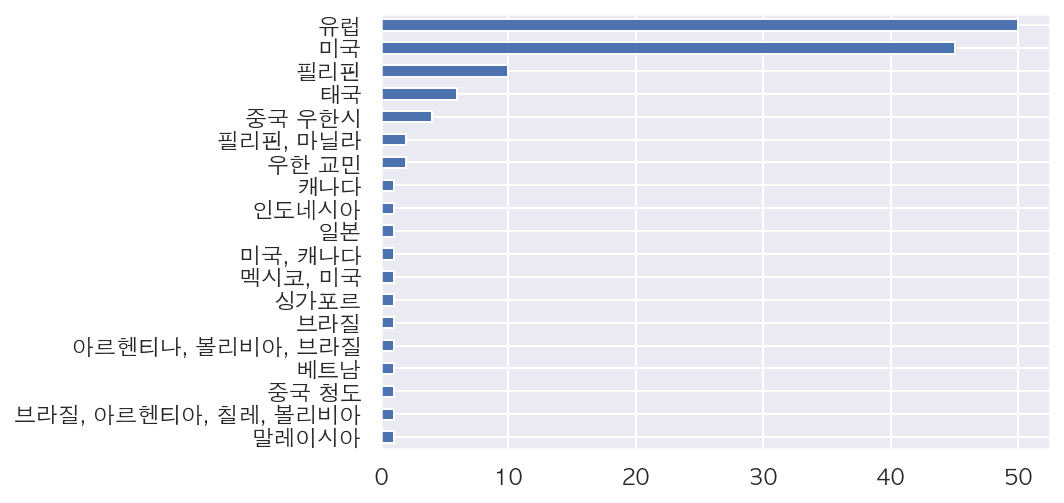

In [66]:
oversea_count.plot.barh()

In [67]:
day_oversea.iloc[-1, 0]

Timestamp('2020-03-30 00:00:00')

In [68]:
for i, val in enumerate(oversea_count[-5:]):
    num = -5 + i
    print(day_oversea["확진일자"].nunique(), i, num, val)

33 0 -5 4
33 1 -4 6
33 2 -3 10
33 3 -2 45
33 4 -1 50


In [69]:
oversea_count.index[-1]

'유럽'

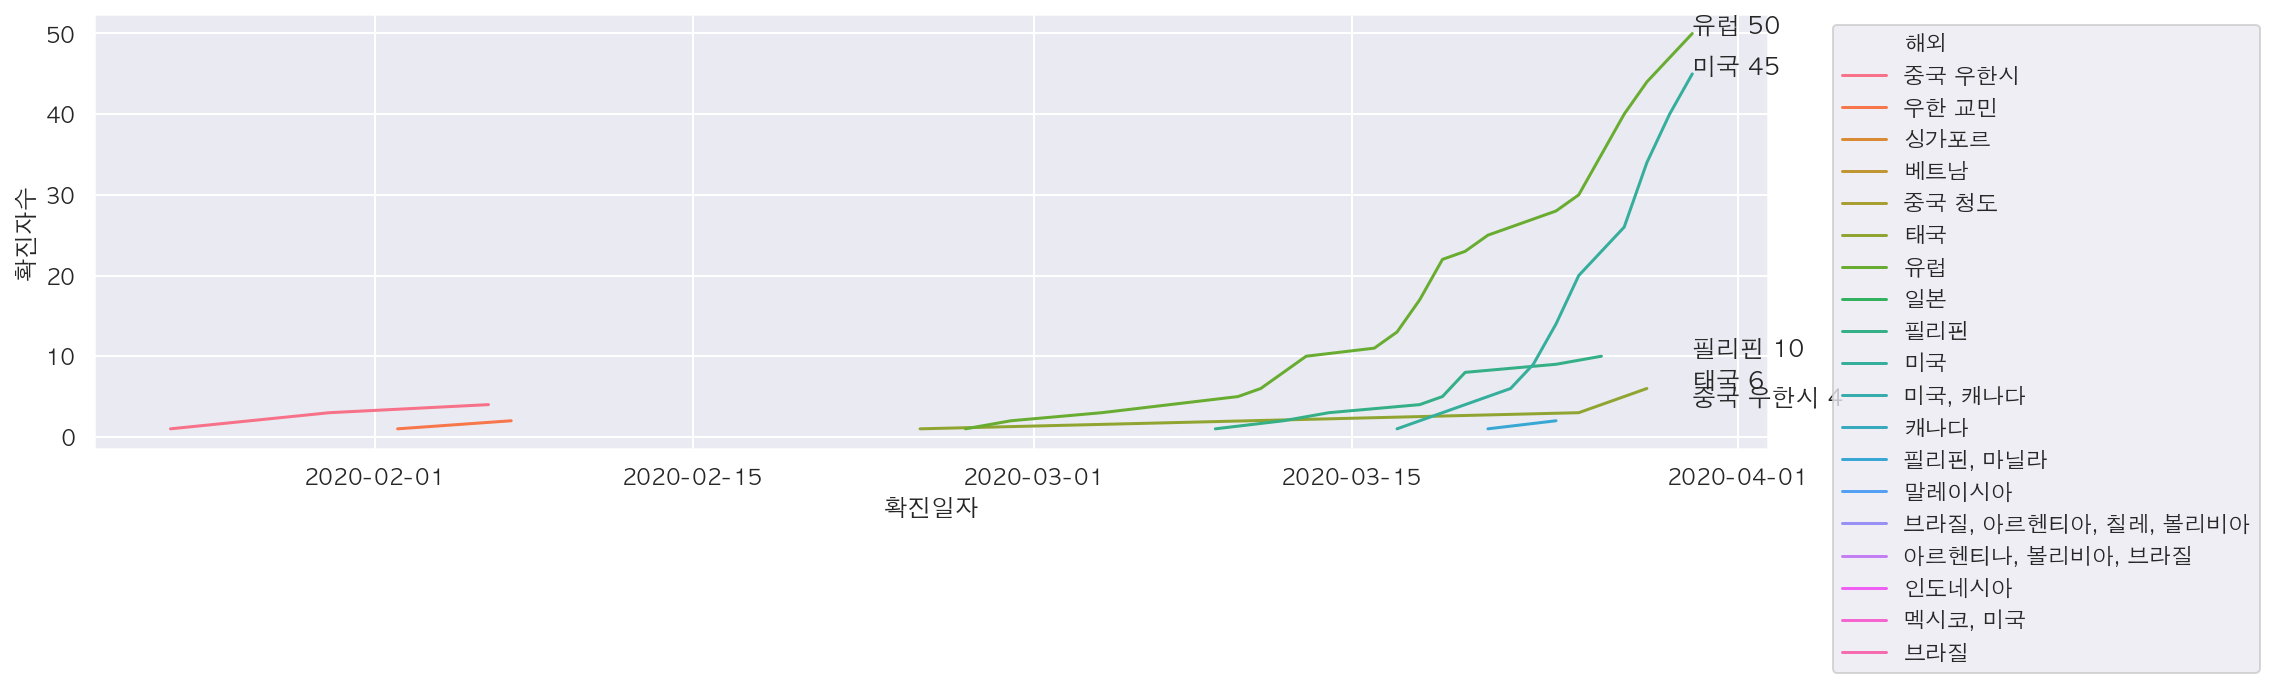

In [70]:
plt.figure(figsize=(15, 4))
g = sns.lineplot(data=day_oversea, x="확진일자",  y="확진자수", hue="해외")
g.legend(bbox_to_anchor=(1.3, 1))
last_day = day_oversea.iloc[-1, 0]

for i, val in enumerate(oversea_count[-5:]):
    i_num = -5 + i
    g.text(x=last_day, y=val, s=f"{oversea_count.index[i_num]} {val}")

In [71]:
df_oversea["구"] = df_oversea["거주지"]
df_oversea.loc[~df_oversea["거주지"].str.endswith("구"), "구"] = "타지역"

In [72]:
oversea_count = df_oversea["구"].value_counts()
oversea_count

강남구     20
서초구     12
송파구     12
타지역     11
동작구      8
용산구      7
중랑구      6
강동구      5
강서구      5
마포구      5
성북구      4
광진구      4
영등포구     4
관악구      3
은평구      3
도봉구      3
노원구      3
구로구      3
서대문구     3
성동구      2
중구       2
동대문구     2
금천구      1
종로구      1
양천구      1
강북구      1
Name: 구, dtype: int64

In [73]:
df["구"] = df["거주지"]
df.loc[~df["거주지"].str.endswith("구"), "구"] = "타지역"
df.loc[df["거주지"] == "대구", "구"] = "타지역"
gu_count = df["구"].value_counts()

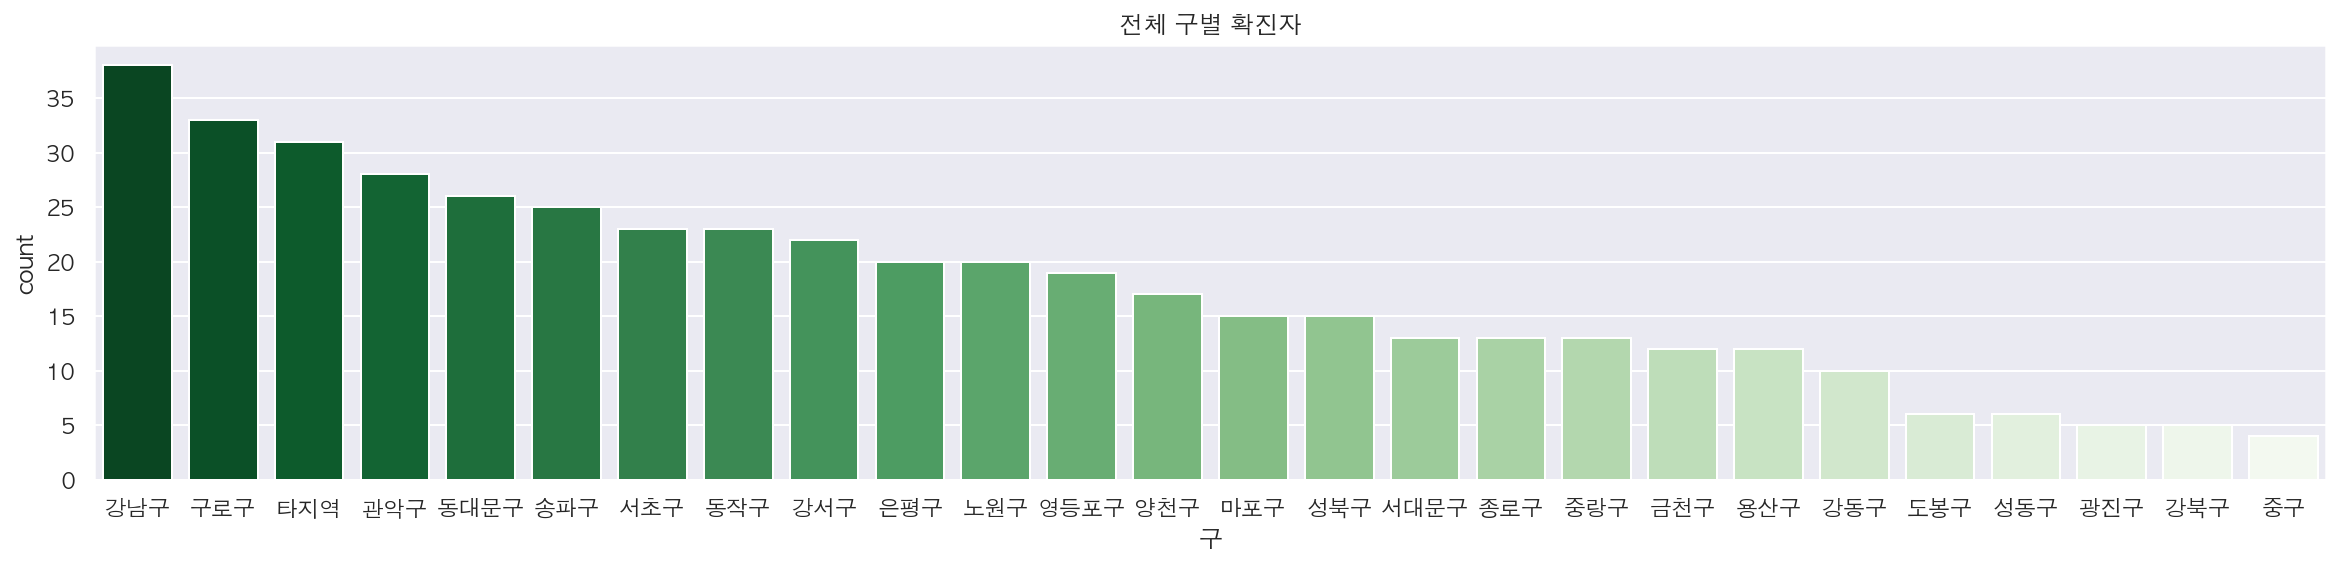

In [74]:
plt.figure(figsize=(20, 4))
plt.title("전체 구별 확진자")
sns.countplot(data=df, x="구", order=gu_count.index, palette="Greens_r")

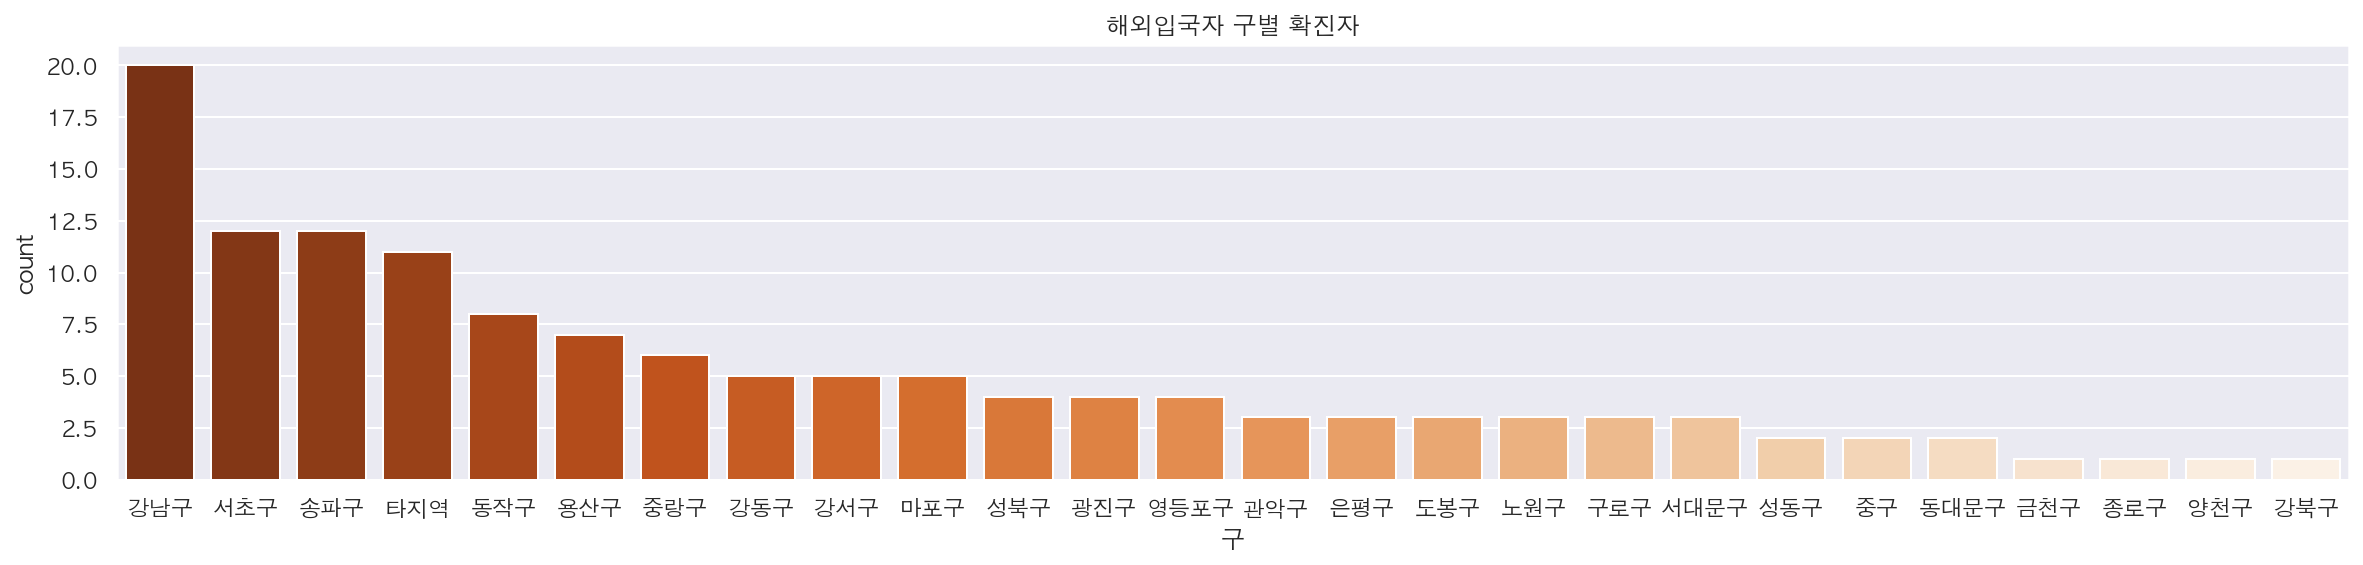

In [75]:
plt.figure(figsize=(20, 4))
plt.title("해외입국자 구별 확진자")
sns.countplot(data=df_oversea, x="구", order=oversea_count.index, palette="Oranges_r")

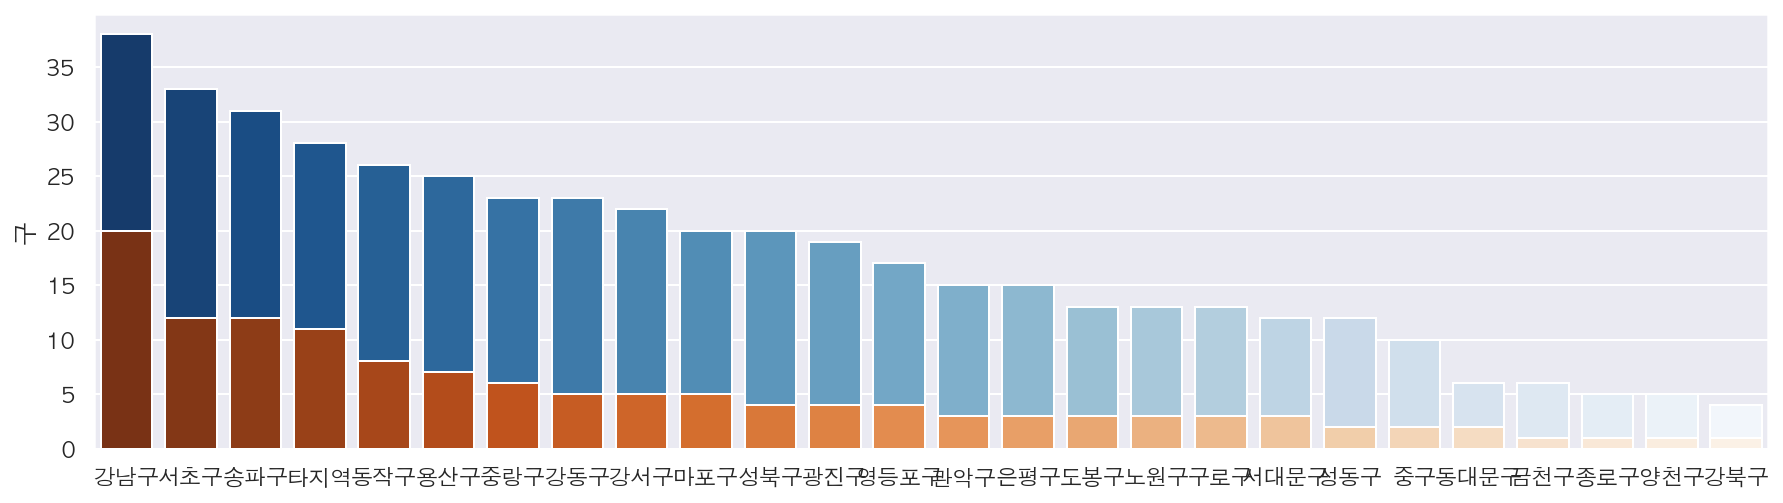

In [76]:
plt.figure(figsize=(15, 4))
sns.barplot(x=gu_count.index, y=gu_count, palette="Blues_r")
sns.barplot(x=oversea_count.index, y=oversea_count, palette="Oranges_r")

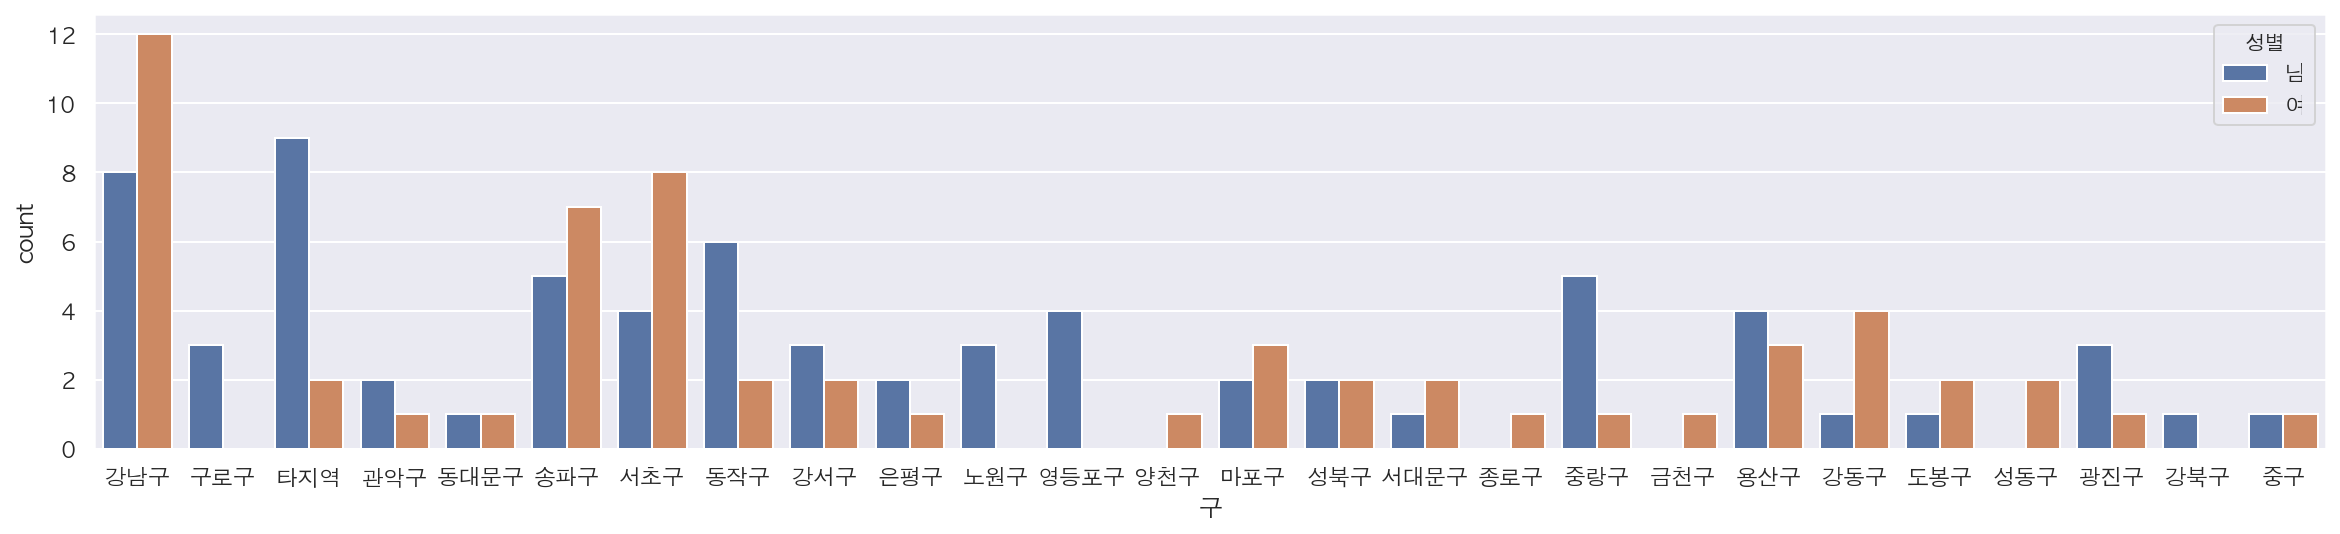

In [77]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df_oversea, x="구", hue="성별", order=gu_count.index)

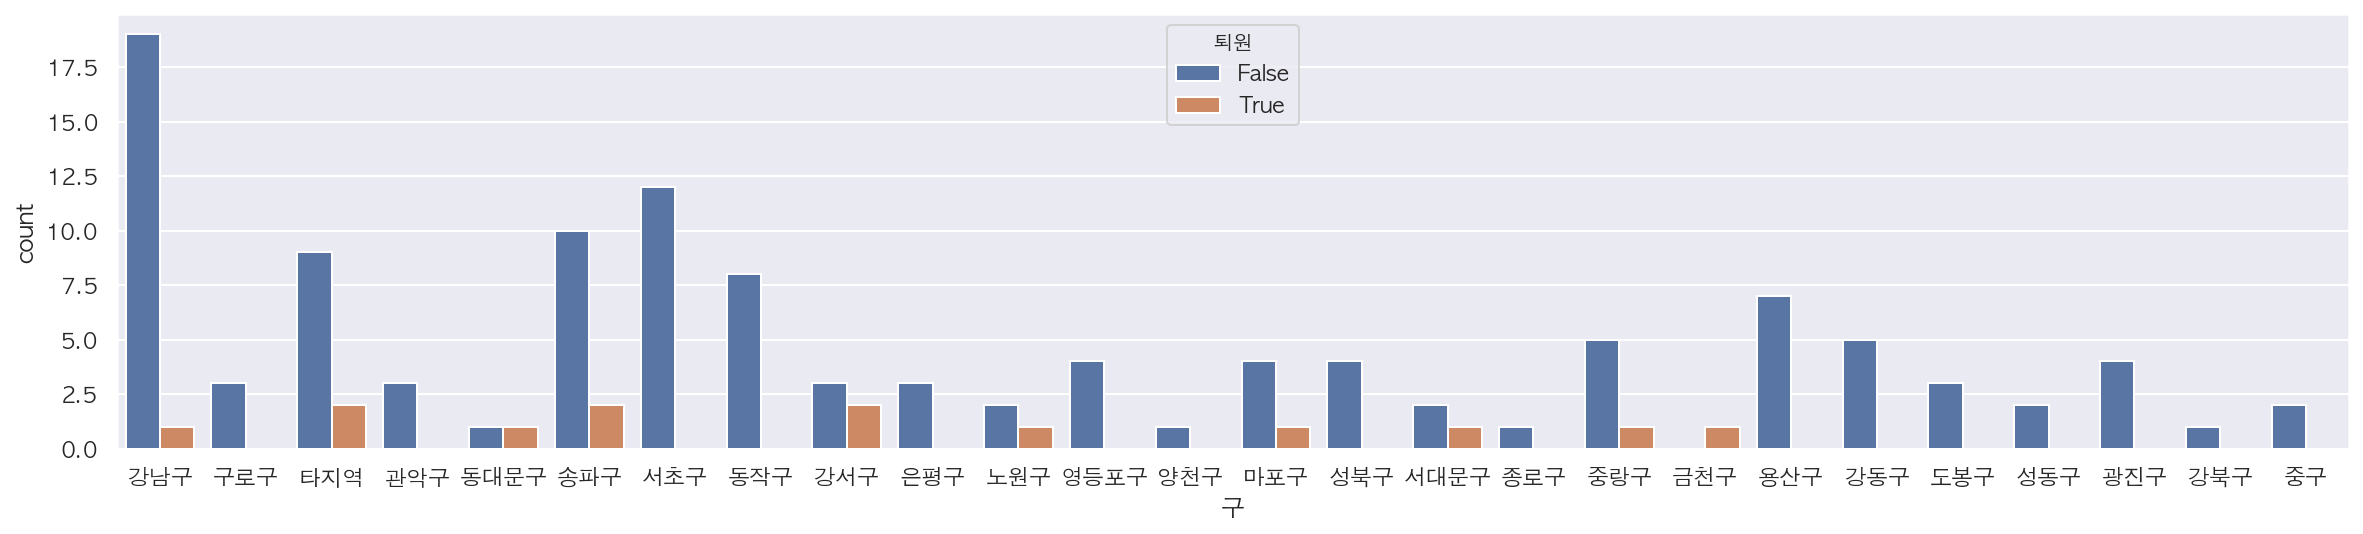

In [78]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df_oversea, x="구", hue="퇴원", order=gu_count.index)

In [79]:
df_oversea.loc[df_oversea["구"].isin(["강남구", "서초구", "송파구"]), "해외"].value_counts()

미국                      21
유럽                      16
태국                       1
필리핀                      1
싱가포르                     1
브라질, 아르헨티아, 칠레, 볼리비아     1
아르헨티나, 볼리비아, 브라질         1
인도네시아                    1
미국, 캐나다                  1
Name: 해외, dtype: int64

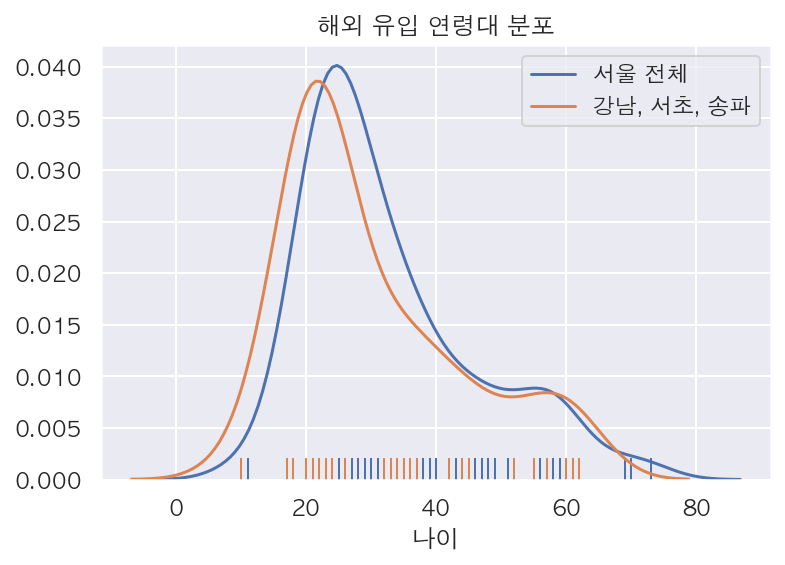

In [80]:
plt.title("해외 유입 연령대 분포")
sns.distplot(df_oversea["나이"], hist=False, rug=True, label="서울 전체")
sns.distplot(df_oversea.loc[df_oversea["구"].isin(["강남구", "서초구", "송파구"]), "나이"],
             hist=False, rug=True, label="강남, 서초, 송파")

In [81]:
from wordcloud import WordCloud

def wordcloud(data, width=1200, height=600):
    word_draw = WordCloud(font_path='/Library/Fonts/NanumBarunGothic.ttf',
                                    width = width, height = height, 
                                    background_color="#FFFFFF",
                                    random_state=42,
                                   ).generate(data)

    plt.figure(figsize=(15,10))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show() 

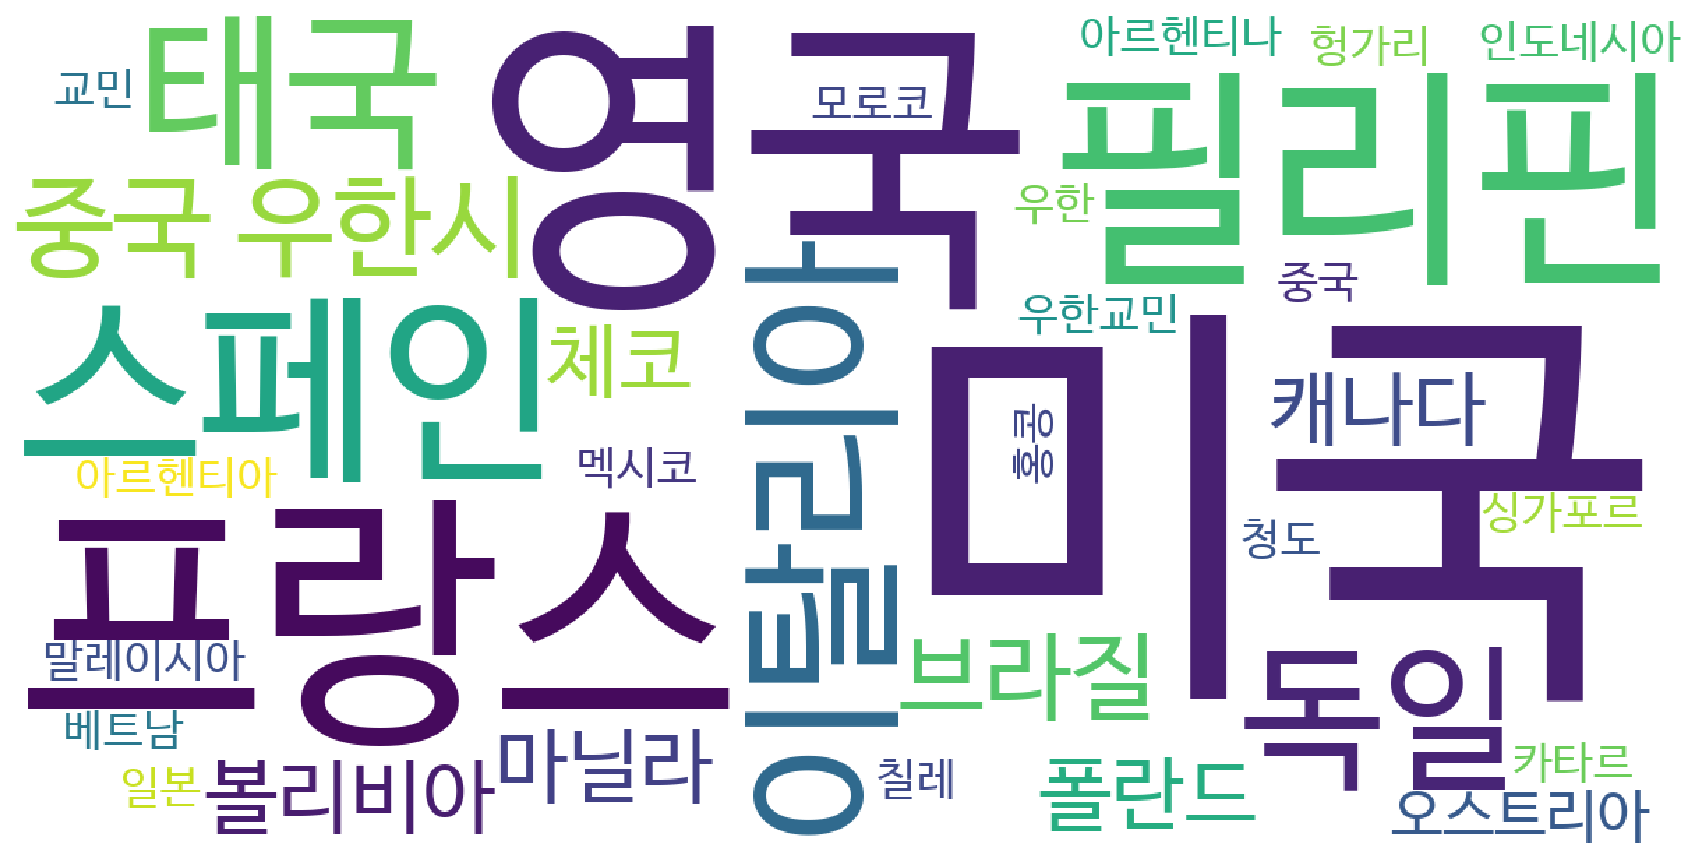

In [82]:
wordcloud(" ".join(df_oversea["여행력"]))

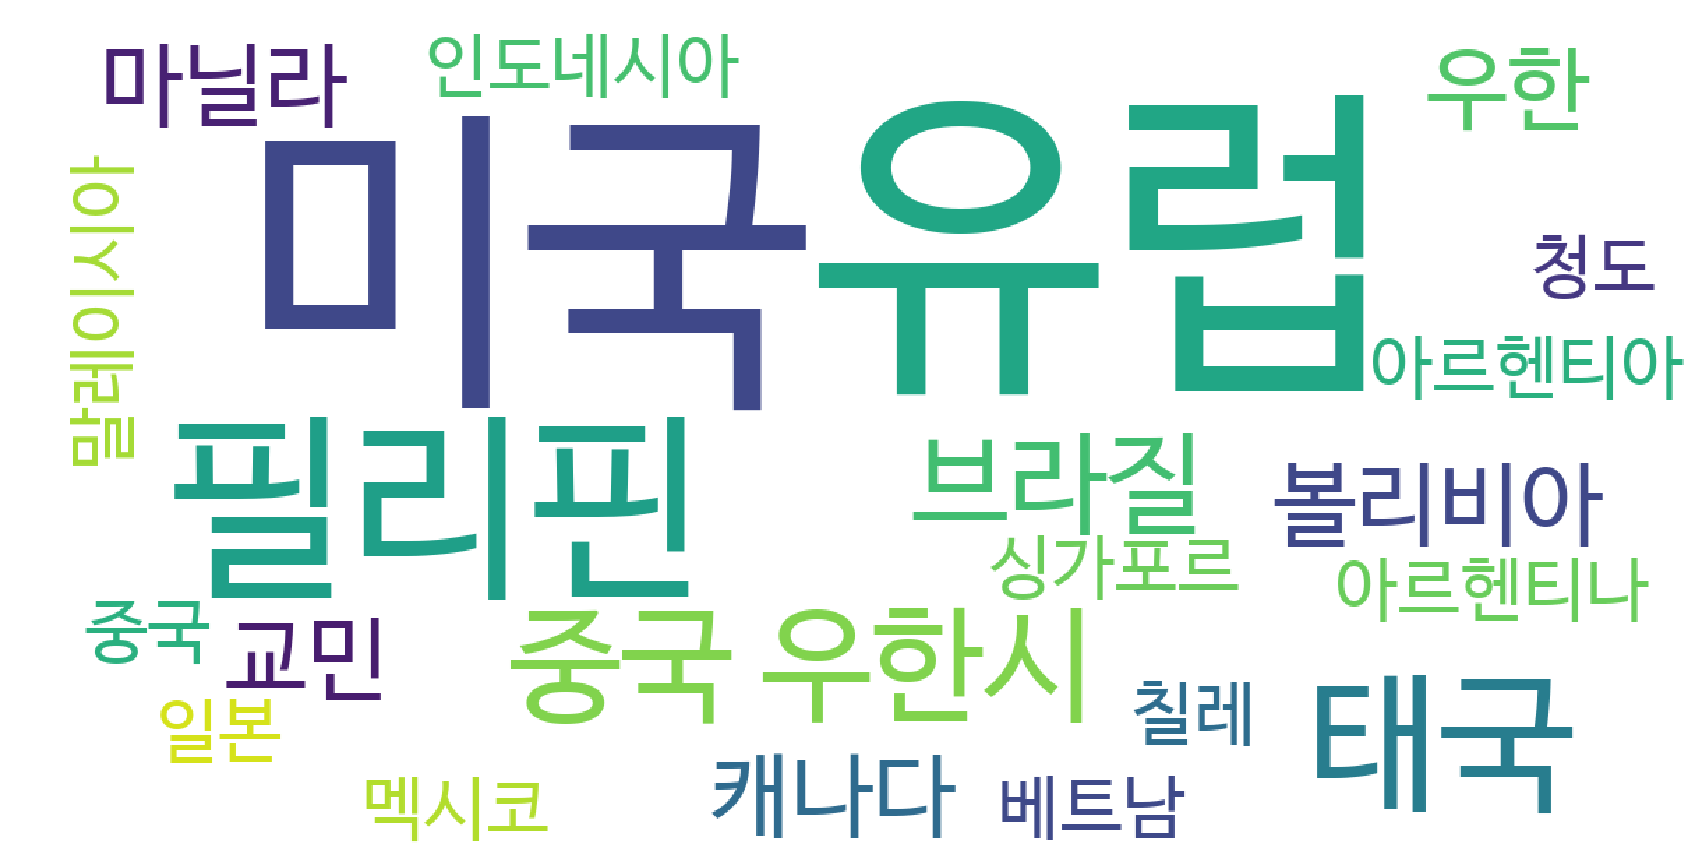

In [83]:
wordcloud(" ".join(df_oversea["해외"]))